In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cust_details = pd.read_excel("churn_data.xlsx")
contract = pd.read_excel("churn_data.xlsx", sheet_name = 1)
phone_service = pd.read_excel("churn_data.xlsx", sheet_name = 2)
internet_service = pd.read_excel("churn_data.xlsx", sheet_name = 3)

In [11]:
cust_details.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,No,9.044207
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,No,9.055092
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,Yes,3.800406
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,Yes,12.631122
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,Yes,3.187128


## Step 1 of Analysis: Define the goal

Goal: Find out if there are any correlations in the data that might help explain/understand customer churn.

### Why does this matter?
It costs the company lots of money to lose existing customers and more to acquire new customers.

#### The Target Variable:
Churn

### Initial Hypotheses:
- Possible disatisfaction of service for specific groups.
- Maybe costs are becoming to high.
- Maybe they are leaving after a while to find a newer/better/cheaper service.
- Possible newer customers just don't stick around as much but the ones who do become loyal customers.
- Packages of services aren't appealing to certain groups?

Need to examine subgroups of all columns above; specifically focus on family type, eg. (dependents and partner or no dependents and no partner)


### Minimum Viable Product

Strong takeaway as to something in the data that might be influencing churn.  Possible extemporaneous factor that is causing the churn but is still correlated to another factor in the data.

MVP here would be one or two categories or subgroups that helps give an understanding of how/why the churn might be happening.

In [22]:
## Step 2 getting to know the data

cust_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   float64
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   float64
 6   internet_service   7049 non-null   float64
 7   contract_type      7049 non-null   float64
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(7), object(6)
memory usage: 716.0+ KB


In [33]:
cust_details.churn.value_counts() / cust_details.shape[0]

# Roughly 26.5% of all customers in the dataset churned

No     0.734714
Yes    0.265286
Name: churn, dtype: float64

In [41]:
cust_details[cust_details.churn == 'No'].monthly_charges.sum()

# These customers represent a loss of $317240 of revenue per month based on their monthly charges.
# This equates to roughly $3.8 million annually. 

317240.35

In [78]:
# Let's check the contract, phone, internet, and payment types to see if there's any obvious connection.

# Payment types with churn
cust_details[cust_details.churn == 'Yes'].payment_type.value_counts()


Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     259
Credit card (automatic)       232
Name: payment_type, dtype: int64

In [77]:
# Payment types without churn
cust_details[cust_details.churn == 'No'].payment_type.value_counts()

Mailed check                 1304
Electronic check             1294
Credit card (automatic)      1292
Bank transfer (automatic)    1289
Name: payment_type, dtype: int64

In [79]:
# It seems as though people who paid with an electronic check accounted for the vast majority of people who churned
# and people who didn't churn paid were evenly distributed for payment type.

In [80]:
# Contract types with churn

cust_details[cust_details.churn == 'Yes'].contract_type.value_counts()

0.0    1656
1.0     166
2.0      48
Name: contract_type, dtype: int64

In [81]:
# Contract types with churn

cust_details[cust_details.churn == 'No'].contract_type.value_counts()

0.0    2220
2.0    1649
1.0    1310
Name: contract_type, dtype: int64

In [ ]:
# Month to month customers were by FAR the customers who churned.

In [82]:
# Internet service types with churn

cust_details[cust_details.churn == 'Yes'].internet_service.value_counts()

2.0    1297
1.0     460
0.0     113
Name: internet_service, dtype: int64

In [83]:
# Internet service types with churn

cust_details[cust_details.churn == 'No'].internet_service.value_counts()

1.0    1962
2.0    1801
0.0    1416
Name: internet_service, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='Count'>

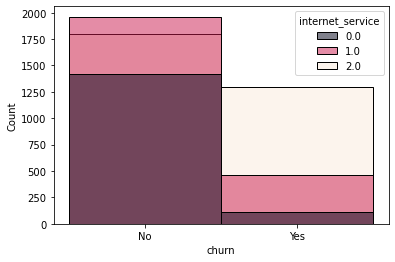

In [100]:
## Farm more people with Fiber optic internet service churned than others. 2 = Fiber Optic
sns.histplot(data=cust_details, x = 'churn', hue = 'internet_service', palette = 'rocket')

In [86]:
# Phone service types with churn

cust_details[cust_details.churn == 'Yes'].phone_service.value_counts()

2.0    850
1.0    849
0.0    171
Name: phone_service, dtype: int64

In [87]:
# Phone service types with churn

cust_details[cust_details.churn == 'No'].phone_service.value_counts()

1.0    2546
2.0    2121
0.0     512
Name: phone_service, dtype: int64

In [88]:
# No major discrepancy in phone service types related to churn

<AxesSubplot:xlabel='churn', ylabel='Count'>

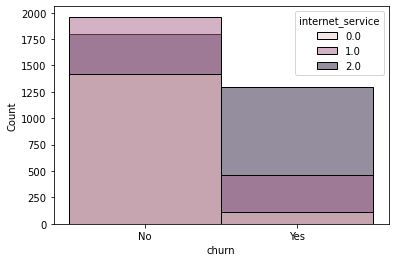